## Decision Tree Visualization

### Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each node finds the best threshold on that feature to further classify/predict more accurately, each branch represents an outcome of that threshold, and each leaf node holds a class label.
<br><br>
<img src="./data/image1.PNG">

In [24]:
from matplotlib import pyplot as plt # For plotting
from sklearn import datasets # For loading standard datasets
from sklearn.tree import DecisionTreeClassifier # To run decision tree model
from sklearn import tree # to visualize decision trees
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Iris Dataset Description:
- Classes: 3
- Samples per class: 50
- Samples total: 150
- Dimesionaltiy: 4
- Source: https://archive.ics.uci.edu/ml/datasets/iris

<br>
<strong>Quick Tip:</strong> sklearn.datasets has some toy datasets, the package also has helpers to fetch larger datasets commonly used by the machine learning community

In [25]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [26]:
# Initialize the model
clf = DecisionTreeClassifier()
# Fir the model
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Task
- Train your own decision tree and play with the following hyper-parameters then state your observations on at least 15 different hyper-parameter settings. Following are only some of the parameters:
    - __Must read__: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    - max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    - min_samples_split : The minimum number of samples required to split an internal node.
    - min_samples_leaf : The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression.
    - random state :  Controls the randomness of the estimator
    
- Write a function to calculate the accuracy
- Print accuracies for each hyper-parameter setting used. Print in following format:
    ```
    1. PARAMS[random_state=1, max_depth=....] , Accuracy=0.97
    2. PARAMS[random_state=42, min_samples_split=....] , Accuracy=0.94
    ..
    .
    ```
- Perform the same set of acitvites on different dataset: https://gist.github.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# initialise and then Fit the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [15]:
# Gives text representation to the decision tree trained
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [16]:
# To save the above info in a text file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### How to Visualize Decision Trees using Matplotlib
Scikit-learn version >=0.21.0 allows Decision Trees to be plotted with matplotlib using 'sklearn.tree.plot_tree'

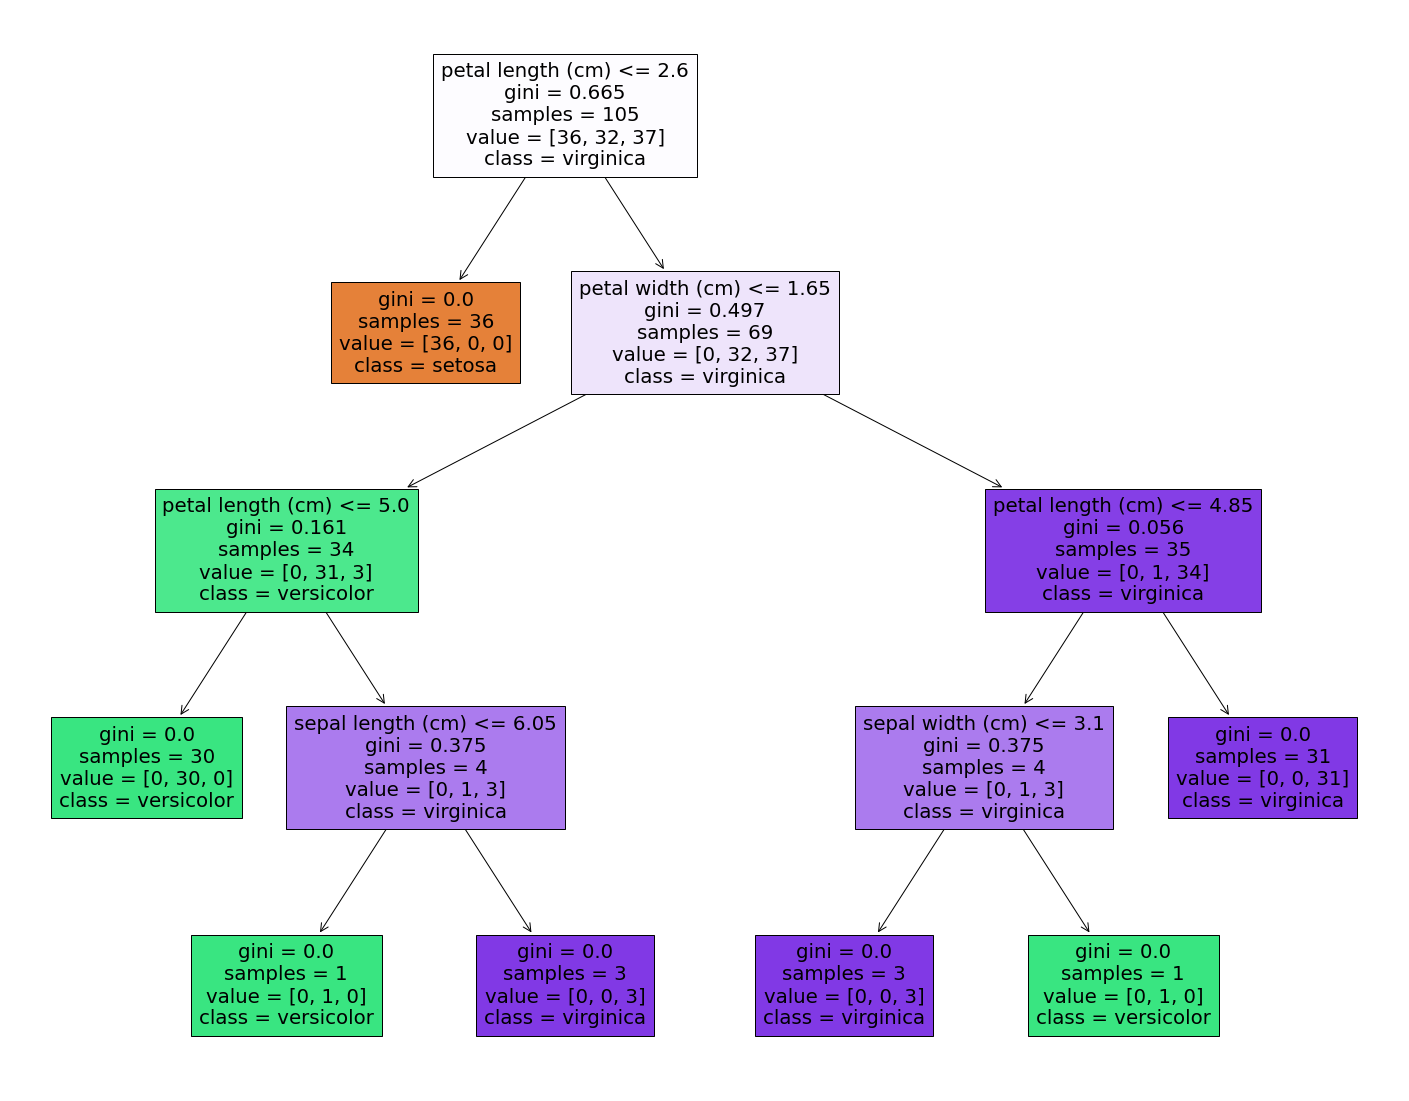

In [17]:
# Visualize the results in a beautiful manner using sklearn plot_tree
# Look documentation for modifying fonts: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

 ##### In the above figure color of the nodes represent the majoritiy of the class

In [18]:
# TODO: Write accuracy function here

def accuracy(y_test,y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



In [19]:
# TODO: Print 15 hyperparam settings along with accuracy
# print("Hyperparameters = DEFAULT( criterion='gini', splitter='best', max_depth=None )")
# y_pred = clf.predict(X_test)
# accuracy(y_test,y_pred)
# print()

print("Hyperparameters = criterion='entropy', splitter='best', max_depth=None")
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='random', max_depth=None")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='entropy', splitter='random', max_depth=None")
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='random', max_depth=2")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='random', max_depth=6")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

#Gini impurity gives more accuracy if all the methods are same compared to entropy ( recorded = 0.97)
print("Hyperparameters = criterion='gini', splitter='random', max_depth=6")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

#Entropy impurity gives less accuracy if all the methods are same compared to gini ( recorded = 0.95)
print("Hyperparameters = criterion='entropy', splitter='random', max_depth=6")
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

#If we set max_depth to 2 entropy gives less accuracy compared to ginni
print("Hyperparameters = criterion='entropy', splitter='random', max_depth=6")
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='entropy', splitter='random', max_depth=2, min_samples_split=4")
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2,min_samples_split = 4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='random', max_depth=2, min_samples_split=4")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2,min_samples_split = 4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='random', max_depth=6, min_samples_leaf=3")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2,min_samples_leaf=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='entopy', splitter='random', max_depth=2, min_samples_leaf=3")
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2,min_samples_leaf=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='entopy', splitter='best', max_depth=2, min_samples_leaf=3")
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=2,min_samples_leaf=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='entopy', splitter='best', max_depth=2, random_state=42,min_samples_leaf=5")
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2, random_state=42,min_samples_leaf=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='best', max_depth=2, max_leaf_nodes=5")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2, max_leaf_nodes=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='best', max_depth=2, max_leaf_nodes=5")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2, max_leaf_nodes=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='best', max_depth=2, max_features=1")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2, max_features=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='best', max_depth=2, max_features=1")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2, max_features=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='best', max_depth=2, min_weight_fraction_leaf=0.45")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2, min_weight_fraction_leaf=0.45)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()

print("Hyperparameters = criterion='gini', splitter='best', max_depth=2, min_weight_fraction_leaf=0.35")
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=2, min_weight_fraction_leaf=0.35)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy(y_test,y_pred)
print()


Hyperparameters = criterion='entropy', splitter='best', max_depth=None
Accuracy: 0.9555555555555556

Hyperparameters = criterion='gini', splitter='random', max_depth=None
Accuracy: 0.9333333333333333

Hyperparameters = criterion='entropy', splitter='random', max_depth=None
Accuracy: 0.9555555555555556

Hyperparameters = criterion='gini', splitter='random', max_depth=2
Accuracy: 0.6

Hyperparameters = criterion='gini', splitter='random', max_depth=6
Accuracy: 0.9777777777777777

Hyperparameters = criterion='gini', splitter='random', max_depth=6
Accuracy: 0.9777777777777777

Hyperparameters = criterion='entropy', splitter='random', max_depth=6
Accuracy: 0.9555555555555556

Hyperparameters = criterion='entropy', splitter='random', max_depth=6
Accuracy: 0.9333333333333333

Hyperparameters = criterion='entropy', splitter='random', max_depth=2, min_samples_split=4
Accuracy: 0.9333333333333333

Hyperparameters = criterion='gini', splitter='random', max_depth=2, min_samples_split=4
Accuracy: 0

In [21]:
# Save the figure
fig.savefig("decistion_tree.png")

### How to visualize decision trees using graphviz

If you get runtime error with graphviz, refer to
- https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

In [ ]:
! pip install graphviz

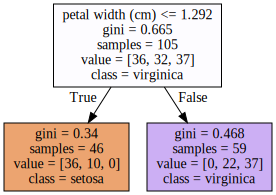

In [22]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Sparsh/anaconda3/Lib/site-packages/graphviz'
# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [23]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Resources
- https://mljar.com/blog/visualize-decision-tree/ (source code)
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
- https://explained.ai/decision-tree-viz/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html